In [14]:
library(dplyr)
library(tibble)
library(readr)
library(ggplot2)
library(purrr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



In [305]:
a = attach("~/Project/Alz/muti_mp_3/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000103642.mv_susie.model.cv_diag.RData")

In [310]:
b = attach("~/Project/Alz/muti_mp_3/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.mv_susie.model.cv.RData")

In [313]:
c = attach("~/Project/Alz/muti_mp_3/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.transformed_XY.RData")

In [323]:
d = b$full_model$fitted[,1]

In [387]:
summary(lm(fitted[,1]~c$scaled_ENSG00000265148[[2]][,1]))$coef
summary(lm(fitted[,2]~c$scaled_ENSG00000265148[[2]][,2]))$coef
summary(lm(fitted[,3]~c$scaled_ENSG00000265148[[2]][,3]))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.0031796376,0.0004296505,-7.400521,4.129822e-13
"c$scaled_ENSG00000265148[[2]][, 1]",0.0006226227,0.0004299744,1.448046,1.480776e-01


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.0028629930,0.0004375242,-6.5436214,1.429159e-10
"c$scaled_ENSG00000265148[[2]][, 2]",0.0003361268,0.0004379399,0.7675179,4.431187e-01


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.002790447,0.0005461027,-5.109747,3.987215e-07
"c$scaled_ENSG00000265148[[2]][, 3]",0.002086041,0.0005464242,3.817622,1.445493e-04


In [324]:
f = c$scaled_ENSG00000265148[[2]][,1]

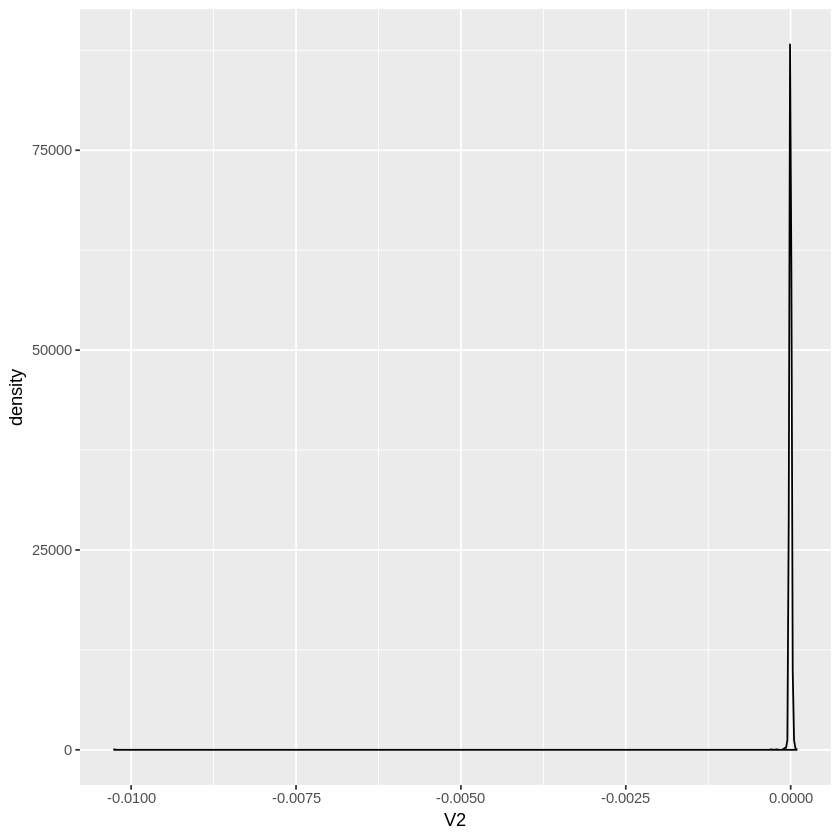

In [394]:
b$full_model$coef%>%as.data.frame()%>%as_tibble()%>%ggplot(aes(x = V2))+geom_density()

In [326]:
lm(d ~ f)%>%summary()


Call:
lm(formula = d ~ f)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.038913 -0.000667  0.002801  0.005473  0.013000 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -2.258e-05  3.205e-04   -0.07    0.944  
f            6.383e-04  3.207e-04    1.99    0.047 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.008258 on 662 degrees of freedom
  (234 observations deleted due to missingness)
Multiple R-squared:  0.005947,	Adjusted R-squared:  0.004446 
F-statistic: 3.961 on 1 and 662 DF,  p-value: 0.04699


In [330]:
lm(d[1:180] ~ f[1:180])%>%summary()


Call:
lm(formula = d[1:180] ~ f[1:180])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.035908 -0.000098  0.002369  0.004381  0.010061 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.0006648  0.0006654   0.999   0.3196  
f[1:180]    0.0009212  0.0005469   1.684   0.0944 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00771 on 134 degrees of freedom
  (44 observations deleted due to missingness)
Multiple R-squared:  0.02074,	Adjusted R-squared:  0.01343 
F-statistic: 2.837 on 1 and 134 DF,  p-value: 0.09442


In [347]:
lm(d[181:180+180] ~ f[181:180+180])%>%summary()


Call:
lm(formula = d[181:180 + 180] ~ f[181:180 + 180])

Residuals:
ALL 1 residuals are 0: no residual degrees of freedom!

Coefficients: (1 not defined because of singularities)
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)      0.0004953         NA      NA       NA
f[181:180 + 180]        NA         NA      NA       NA

Residual standard error: NaN on 0 degrees of freedom
  (1 observation deleted due to missingness)


In [349]:
lm(d[181+180:181+180+181] ~ f[181+180:181+180+181])%>%summary()


Call:
lm(formula = d[181 + 180:181 + 180 + 181] ~ f[181 + 180:181 + 
    180 + 181])

Residuals:
ALL 1 residuals are 0: no residual degrees of freedom!

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)
(Intercept)                  -0.0003086         NA      NA       NA
f[181 + 180:181 + 180 + 181]         NA         NA      NA       NA

Residual standard error: NaN on 0 degrees of freedom
  (1 observation deleted due to missingness)


In [350]:
lm(d[181+180+181+180:898] ~ f[181+180+181+180:898])%>%summary()


Call:
lm(formula = d[181 + 180 + 181 + 180:898] ~ f[181 + 180 + 181 + 
    180:898])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.032620 -0.000773  0.003030  0.005937  0.009293 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)
(Intercept)                  -0.0006818  0.0007748  -0.880    0.381
f[181 + 180 + 181 + 180:898]  0.0003312  0.0007295   0.454    0.651

Residual standard error: 0.008726 on 126 degrees of freedom
  (591 observations deleted due to missingness)
Multiple R-squared:  0.001634,	Adjusted R-squared:  -0.00629 
F-statistic: 0.2062 on 1 and 126 DF,  p-value: 0.6506


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



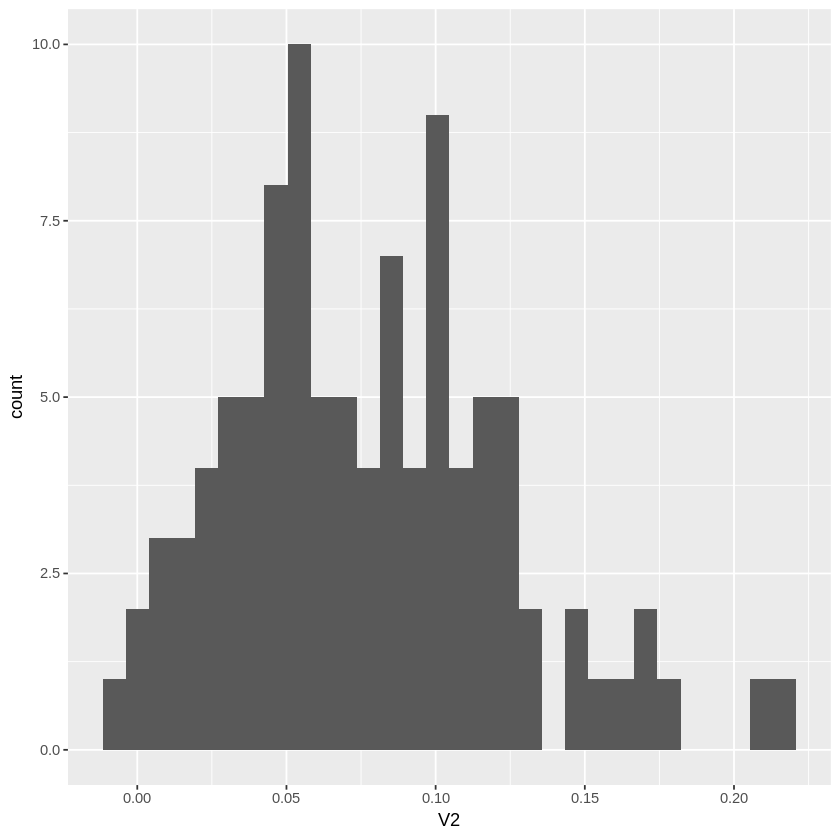

In [532]:
a$cv_df%>%pull(r2)%>%as.data.frame()%>%t()%>%as_tibble()%>%ggplot(aes(V2))+geom_histogram()


In [536]:
mean_r2 = cv_df%>%pull(pval)%>%as.data.frame()%>%t()%>%as_tibble()%>%na.omit()%>%colMeans()

In [537]:
mean_r2

V1          V2          V3 
0.005403043 0.028092944 0.007390556

In [398]:
pred = function(X,Wgt){
    a = X%*%Wgt[2:nrow(Wgt),]+Wgt[1,]
    return(a)
}


In [399]:
 b$full_model$coef

8.316963e-03,-1.025920e-02,-6.871704e-03
-1.783452e-06,-4.797925e-06,-6.544397e-06
-8.642090e-06,-1.255853e-05,-1.803177e-05
3.880621e-06,6.932639e-06,3.729005e-06
-4.159835e-06,-2.940889e-06,-4.458647e-06
-5.310637e-05,-1.292583e-05,-1.332655e-07
-2.216869e-06,8.853716e-06,9.779049e-06
4.355607e-06,8.210905e-06,7.549011e-06
-6.128155e-06,-5.814926e-06,-5.655716e-06
-8.735518e-06,-1.269637e-05,-1.829969e-05
-2.579511e-06,-1.998802e-06,-3.455417e-06


In [266]:
a$cv_df%>%pull(pval)%>%as.data.frame()%>%t()%>%as_tibble()%>%ggplot(aes(V2))+geom_histogram()


ERROR: Error in UseMethod("pull"): no applicable method for 'pull' applied to an object of class "NULL"


In [528]:
test1 = a$cv_df%>%select(train_X,train_Y,test_X,test_Y,test_fitted,r2,r2_raw,rmse,weight)

In [494]:
low = test1[49,]
High = test1[3,]
high_name = High$train_X[[1]]%>%colnames()
low_name = Low$train_X[[1]]%>%colnames()
mean(high_name %in% low_name)

[1] 1

In [495]:
see = High$weight%>%as.data.frame%>%as.tibble
see =  see[2:nrow(see),]
max(see)
High%>%pull(r2)%>%as.data.frame()

[1] 0

c.0.496224040862094..0.496246935335345..0.497436355987675.
<dbl>
0.4962240
0.4962469
0.4974364


In [529]:
fitted = (High%>%pull(test_fitted))[[1]]
raw = (High%>%pull(test_Y))[[1]]

In [497]:
summary(lm(fitted[,1] ~ raw[,1] ))

Warning message in summary.lm(lm(fitted[, 1] ~ raw[, 1])):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = fitted[, 1] ~ raw[, 1])

Residuals:
       Min         1Q     Median         3Q        Max 
-7.510e-19 -3.360e-19 -2.620e-19 -1.800e-19  3.559e-17 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -2.516e-02  2.708e-19 -9.288e+16   <2e-16 ***
raw[, 1]     1.219e-19  2.659e-19  4.580e-01    0.647    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.112e-18 on 132 degrees of freedom
  (46 observations deleted due to missingness)
Multiple R-squared:  0.4849,	Adjusted R-squared:  0.481 
F-statistic: 124.3 on 1 and 132 DF,  p-value: < 2.2e-16


In [455]:
compute_r2 = function(raw,fitted){
      pval = rep(0,ncol(raw))
    for (k in 1:ncol(raw)){
        pval[k] = summary(lm( fitted[,k] ~ raw[,k] ))$adj.r.sq
      }
      return(pval)
    }
compute_r2_raw = function(raw,fitted){
      r2 = rep(0,ncol(raw))
      for (j in 1:ncol(raw)){
        r2[j] =  cor(fitted[,j][which(!is.na(raw[,j])),],raw[,j]%>%na.omit())^2
      }
      return(r2)
    }

In [405]:
compute_r2_raw(test$test_Y[[1]],test$test_fitted[[1]])
fitted = test$test_fitted[[1]]
raw = test$test_Y[[1]]
r2 = rep(0,ncol(raw))
j = 1
r2[j] =  cor(fitted[,j][which(!is.na(raw[,j]))],raw[,j]%>%na.omit())^2


[1] 0.0021005452 0.0001951662 0.0032319128

In [432]:
compute_r2_raw = function(raw,fitted){
      r2 = rep(0,ncol(raw))
      for (j in 1:ncol(raw)){
        r2[j] =  cor(fitted[,j][which(!is.na(raw[,j]))],raw[,j]%>%na.omit())^2
      }
      return(r2)
    }

In [134]:

fitted = (test%>%pull(test_fitted))[[1]]
fitted = (test%>%pull())[[1]]%*%(test%>%pull(train_X))[[1]]
raw = (test%>%pull(train_Y))[[1]]

ERROR: Error in (test %>% pull(test_fitted))[[1]] %*% (test %>% pull(train_X))[[1]]: non-conformable arguments


In [133]:
dat = cbind(raw,fitted)
k = 3
i = c(k,ncol(raw)+k)
d = dat[,i]
d = d%>%na.omit
summary(lm( d[,2] ~ d[,1] ))
d


Call:
lm(formula = d[, 2] ~ d[, 1])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.119784  0.009134  0.010346  0.011057  0.018892 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0187127  0.0020445   9.153   <2e-16 ***
d[, 1]      0.0007347  0.0022616   0.325    0.746    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02651 on 168 degrees of freedom
Multiple R-squared:  0.0006278,	Adjusted R-squared:  -0.005321 
F-statistic: 0.1055 on 1 and 168 DF,  p-value: 0.7457


V6,
0.82554105,0.02916113
0.13322126,0.02916113
-0.46357178,0.02926642
0.11978170,0.02920299
-0.46272276,0.02916113
-1.21241167,-0.03777457
-0.37738765,0.02926642
1.33346121,0.02470765
0.69410856,0.03326382
-0.85439162,0.03117701


In [ ]:
cv.performance = matrix(NA,nrow=2,ncol=3)
rownames(cv.performance) = c("rsq","pval")
colnames(cv.performance) = "mv_susie"

 

cv.all = attach("~/Project/Alz/multi/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.transformed_XY.RData")$scaled_ENSG00000265148
cv.all = cv.all[[2]]
N = nrow(cv.all)
cv.sample = sample(N)
cv.all = cv.all[ cv.sample , ]
folds = cut(seq(1,N),breaks=opt$crossval,labels=FALSE)

cv.calls = matrix(NA,nrow=N,ncol=M)

for ( i in 1:opt$crossval ) {
	if ( opt$verbose >= 1 ) cat("- Crossval fold",i,"\n")
	indx = which(folds==i,arr.ind=TRUE)
	cv.train = cv.all[-indx,]
	# store intercept
	intercept = mean( cv.train[,3] )
	cv.train[,3] = scale(cv.train[,3])
	
	# hide current fold
	cv.file = paste(opt$tmp,".cv",sep='')
	write.table( cv.train , quote=F , row.names=F , col.names=F , file=paste(cv.file,".keep",sep=''))	
	arg = paste( opt$PATH_plink ," --allow-no-sex --bfile ",opt$tmp," --keep ",cv.file,".keep --out ",cv.file," --make-bed",sep='')
	system(arg , ignore.stdout=SYS_PRINT,ignore.stderr=SYS_PRINT)

	for ( mod in 1:M ) {
		if ( models[mod] == "blup" ) {
			pred.wgt = weights.bslmm( cv.file , bv_type=2 , snp=genos$bim[,2] )
		}
		else if ( models[mod] == "bslmm" ) {
			pred.wgt = weights.bslmm( cv.file , bv_type=1 , snp=genos$bim[,2] )
		}		
		else if ( models[mod] == "lasso" ) {
			pred.wgt = weights.lasso( cv.file , hsq[1] , snp=genos$bim[,2] )
		}
		else if ( models[mod] == "enet" ) {
			pred.wgt = weights.enet( genos$bed[ cv.sample[ -indx ],] , as.matrix(cv.train[,3]) , alpha=0.5 )
		}		
		else if ( models[mod] == "top1" ) {
			pred.wgt = weights.marginal( genos$bed[ cv.sample[ -indx ],] , as.matrix(cv.train[,3,drop=F]) , beta=T )
			pred.wgt[ - which.max( pred.wgt^2 ) ] = 0
		}

		# predict from weights into sample
		pred.wgt[ is.na(pred.wgt) ] = 0
		cv.calls[ indx , mod ] = genos$bed[ cv.sample[ indx ] , ] %*% pred.wgt
	}
}



In [ ]:
cv.performance = matrix(NA,nrow=2,ncol=3)
rownames(cv.performance) = c("rsq","pval")
colnames(cv.performance) = "mv_susie"

 

cv.all = attach("~/Project/Alz/multi/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.transformed_XY.RData")$scaled_ENSG00000265148
cv.all = cv.all[[2]]
N = nrow(cv.all)
M = 3
cv.sample = sample(N)
cv.all = cv.all[ cv.sample , ]
folds = cut(seq(1,N),breaks=5,labels=FALSE)
cv.calls = matrix(NA,nrow=N,ncol=M
                 )
for ( i in 1:5 ) {
	indx = which(folds==i,arr.ind=TRUE)
	cv.train = cv.all[-indx,]
	# store intercept
	intercept = mean( cv.train[,3] )
	cv.train[,3] = scale(cv.train[,3])
	
}

	for ( mod in 1:M ) {
		
        
        
        
		}

		# predict from weights into sample
		pred.wgt[ is.na(pred.wgt) ] = 0
		cv.calls[ indx , mod ] = genos$bed[ cv.sample[ indx ] , ] %*% pred.wgt
	}
}

In [276]:
cv.performance = matrix(NA,nrow=2,ncol=3)
rownames(cv.performance) = c("rsq","pval")
cv.all = c$scaled_ENSG00000265148
cv.all = cv.all[[2]]
N = nrow(cv.all)
M = 3
cv.sample = sample(N)
cv.all = cv.all[ cv.sample , ]
folds = cut(seq(1,N),breaks=5,labels=FALSE)
cv.calls = matrix(NA,nrow=N,ncol=M
                 )
ls = list()
for ( i in 1:5 ) {
	indx = which(folds==i,arr.ind=TRUE)
	cv.train = cv.all[-indx,]
	# store intercept
	intercept = mean( cv.train[,3] )
	cv.train[,3] = scale(cv.train[,3])
    ls[[i]] = cv.train
}

In [279]:
indx

[1] 719 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736
 [19] 737 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754
 [37] 755 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772
 [55] 773 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790
 [73] 791 792 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808
 [91] 809 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826
[109] 827 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844
[127] 845 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862
[145] 863 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880
[163] 881 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898

V6.x,V6.y,V6
NA,NA,-1.12530823
0.70568789,1.19367214,0.66532336
0.83199424,0.29179678,0.85957501
1.72355646,NA,NA
0.31024847,-0.99671987,-0.17609868
NA,NA,-2.29376159
0.18415402,NA,0.37664757
-0.45731899,0.30053607,0.60011737
1.28275935,-0.28089492,0.17378594
NA,NA,-0.17470707


In [321]:
a = attach("/home/hs3163/Project/mwe/mv_susie_mwe/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.mv_susie.model.cv_diag.RData")

The following object is masked from file:~/Project/Alz/multi/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.mv_susie.model.cv_diag.RData (pos = 5):

    cv_df


The following object is masked from file:~/Project/Alz/multi_mp/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000196735.mv_susie.model.cv_diag.RData:

    cv_df


The following object is masked from file:~/Project/Alz/multi/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.mv_susie.model.cv_diag.RData (pos = 11):

    cv_df




In [368]:
b = attach("/home/hs3163/Project/mwe/mv_susie_mwe/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.mv_susie.model.cv.RData")
c = attach("/home/hs3163/Project/mwe/mv_susie_mwe/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.transformed_XY.RData")

The following object is masked from file:/home/hs3163/Project/mwe/mv_susie_mwe/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.mv_susie.model.cv.RData (pos = 3):

    full_model


The following object is masked from file:~/Project/Alz/multi_mp/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.mv_susie.model.cv.RData:

    full_model


The following object is masked from file:~/Project/Alz/multi_mp/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000196735.mv_susie.model.cv.RData:

    full_model


The following object is masked from file:~/Project/Alz/multi/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.mv_susie.model.cv.RData:

    full_model


The following object is masked from file:~/Project/Alz/multi/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.transformed_XY.RData (pos = 6):

    scaled_ENSG00000265148


The following object is masked from file:~/Project/Alz/multi/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.transformed_

In [ ]:
a = attach("/home/hs3163/Project/mwe/mv_susie_mwe/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000265148.mv_susie.model.cv_diag.RData")

In [12]:
total = attach("~/Project/Alz/muti_mp_3/mv_cv.RData")

Attempting to load the environment ‘package:purrr’



In [67]:
data = total$output
working = data%>%select(-path)
working = working%>%mutate(
  n_of_cs = map_dbl(model,~.x$sets$cs_index%>%length()),
  hsq_ac = map_dbl(model,~.x$hsq[1]),
  hsq_PCC = map_dbl(model,~.x$hsq[2]),
  hsq_DLPFC = map_dbl(model,~.x$hsq[3]),
  total_cs_size = map_dbl(model,(~.x$sets$cs%>%unlist()%>%length())),
  mean_cs_size = total_cs_size/n_of_cs
)
working = working%>%mutate(
  rmse_ac = map_dbl(model,~.x$rmse[1]),
  rmse_PCC = map_dbl(model,~.x$rmse[2]),
  rmse_DLPFC = map_dbl(model,~.x$rmse[3]),
  r2_ac = map_dbl(model,~.x$r2[1]%>%round(3)),
  r2_PCC = map_dbl(model,~.x$r2[2]%>%round(3)),
  r2_DLPFC = map_dbl(model,~.x$r2[3]%>%round(3)),
 pval_ac = map_dbl(model,~.x$pval[1]),
 pval_PCC = map_dbl(model,~.x$pval[2]),
 pval_DLPFC = map_dbl(model,~.x$pval[3])
)

In [58]:
a = working$model[[1]]
a$pval%>%p.adjust( method = "fdr")

V1        V2        V3 
0.5678533 0.5678533 0.5678533

In [16]:
working%>%filter(ID %in% gene[[1]] )%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC)%>%arrange(-r2_DLPFC)%>%select(-ID)%>%colMeans
working%>%filter(ID %in% gene[[2]] )%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC)%>%arrange(-r2_DLPFC)%>%select(-ID)%>%colMeans
working%>%filter(ID %in% gene[[3]] )%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC)%>%arrange(-r2_DLPFC)%>%select(-ID)%>%colMeans


(working%>%filter(ID %in% gene[[1]])%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC))[,8]%>%as.matrix()%>%median

ERROR: Error in ID %in% gene[[1]]: object 'gene' not found


In [68]:
dir = "~/Project/Alz/"
Proj = c("Alz_AC_SNP","Alz_DLPFC_SNP","Alz_PCC_SNP")
tmp = tibble(
  Proj_Name = Proj
)
analysis = tmp%>%mutate(
  result_data = map(Proj_Name,~read_delim(paste(dir,.x,"/result/all_result.txt",sep = ""),delim = "\t")%>%filter(FILE!="FILE")),
  result_data_TWAS = map(result_data,~.x%>%filter(!is.na(BEST.GWAS.ID))%>%select(-FILE)%>%mutate(
      MODELCV.R2 = as.numeric(MODELCV.R2),
      MODELCV.PV = as.numeric(MODELCV.PV) ,TWAS.P.Adj = p.adjust(TWAS.P, method = "fdr"))),
        twas_gene = map(result_data_TWAS,~.x$ID),
        psed_gene = map(result_data_TWAS,~.x%>%filter(TWAS.P.Adj<0.05)),
        r2 = map(result_data_TWAS,~.x%>%pull(MODELCV.R2)%>%as.numeric%>%na.omit()%>%mean()),
        pval = map(result_data_TWAS,~.x%>%pull(MODELCV.PV)%>%as.numeric%>%na.omit()%>%mean())
)



analysis_arch = tmp%>%mutate(
  result_data = map(Proj_Name,~read_delim(paste(dir,.x,"/result_arch/all_result.txt",sep = ""),delim = "\t")%>%filter(FILE!="FILE")),
  result_data_TWAS = map(result_data,~.x%>%filter(!is.na(BEST.GWAS.ID))%>%select(-FILE)%>%mutate(
      MODELCV.R2 = as.numeric(MODELCV.R2),
      MODELCV.PV = p.adjust(as.numeric(MODELCV.PV), method = "fdr") ,TWAS.P.Adj = p.adjust(TWAS.P, method = "fdr"))),
        twas_gene = map(result_data_TWAS,~.x$ID),
        psed_gene = map(result_data_TWAS,~.x%>%filter(TWAS.P.Adj<0.05)),
        r2 = map(result_data_TWAS,~.x%>%pull(MODELCV.R2)%>%as.numeric%>%na.omit()%>%mean()),
        pval = map(result_data_TWAS,~.x%>%pull(MODELCV.PV)%>%as.numeric%>%na.omit()%>%mean())
)



Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.



[[1]]
[1] 0.1343816

In [69]:
# Median
analysis%>%select(Proj_Name,twas_gene,r2,pval)%>%mutate(
    idx = c(1),
    susie_r2 = map2_dbl(twas_gene,idx, ~ ((working%>%filter(ID %in% .x)%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC))[,2+3+.y]%>%as.matrix()%>%median)),
    susie_pval = map2_dbl(twas_gene,idx, ~ ((working%>%filter(ID %in% .x)%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC))[,2+.y]%>%as.matrix()%>%median))
    )%>%select(-twas_gene,-idx)


Proj_Name,r2,pval,susie_r2,susie_pval
<chr>,<list>,<list>,<dbl>,<dbl>
Alz_AC_SNP,0.1343816,0.055669,0.0755,0.011189665
Alz_DLPFC_SNP,0.1318,0.04779832,0.0610,0.028067794
Alz_PCC_SNP,0.126025,0.05630469,0.0910,0.008328628


In [70]:
# Mean
analysis%>%select(Proj_Name,twas_gene,r2,pval)%>%mutate(
    idx = c(1),
    susie_r2 = map2_dbl(twas_gene,idx, ~ ((working%>%filter(ID %in% .x)%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC))[,2+3+.y]%>%as.matrix()%>%mean)),
    susie_pval = map2_dbl(twas_gene,idx, ~ ((working%>%filter(ID %in% .x)%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC))[,2+.y]%>%as.matrix()%>%mean))
    )%>%select(-twas_gene,-idx)



Proj_Name,r2,pval,susie_r2,susie_pval
<chr>,<list>,<list>,<dbl>,<dbl>
Alz_AC_SNP,0.1343816,0.055669,0.1256522,0.06482153
Alz_DLPFC_SNP,0.1318,0.04779832,0.1215714,0.10422136
Alz_PCC_SNP,0.126025,0.05630469,0.1301795,0.07965006


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


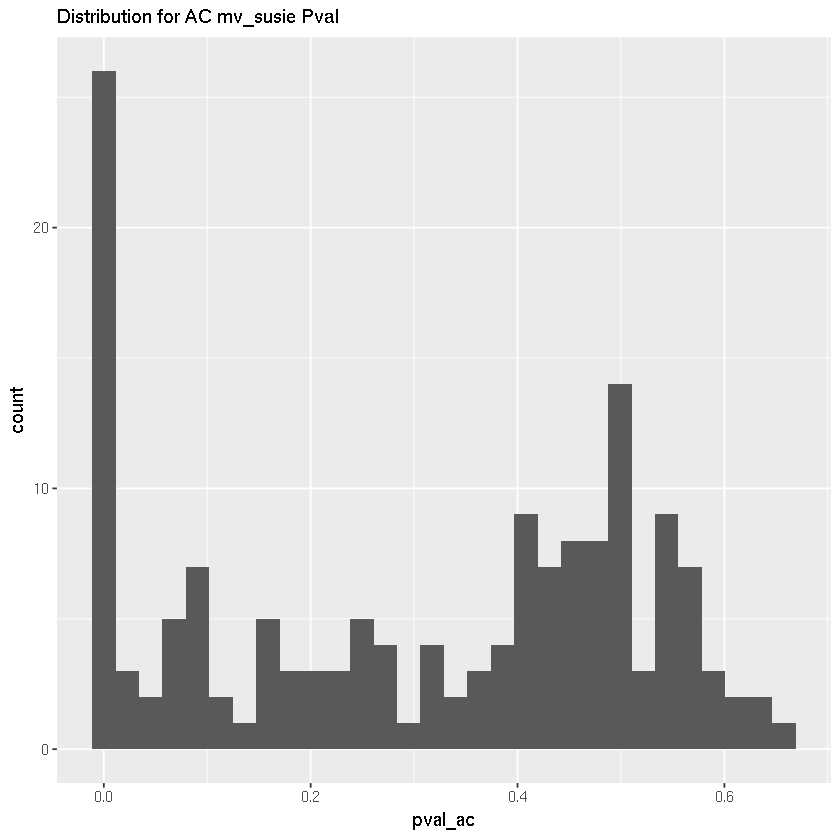

In [71]:
working_plot = working%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC)
working_plot%>%ggplot(aes(x = pval_ac ))+geom_histogram()+ggtitle("Distribution for AC mv_susie Pval")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



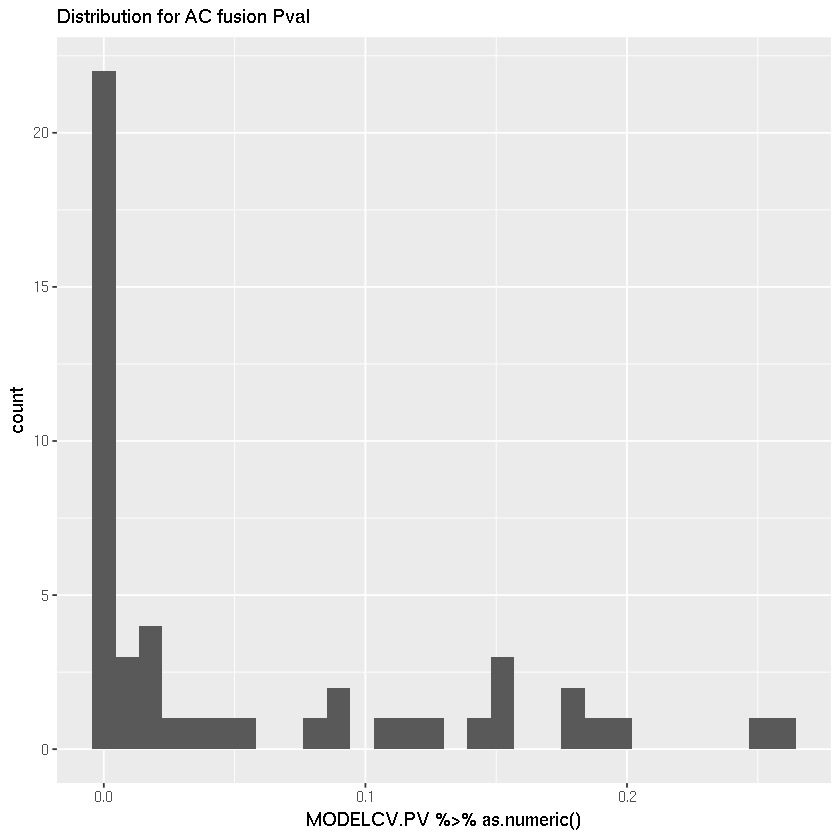

In [72]:
(analysis%>%pull(result_data_TWAS))[[1]]%>%ggplot(aes(x = MODELCV.PV%>%as.numeric()))+geom_histogram()+ggtitle("Distribution for AC fusion Pval")

In [85]:
analysis_comp = analysis%>%select(Proj_Name,twas_gene,result_data_TWAS,r2,pval)%>%mutate(
    idx = c(1,3,2),
    susie_r2 = map2(twas_gene,idx, ~ ((working%>%filter(ID %in% .x)%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC))[,c(1,2+3+.y)])),
    susie_pval = map2(twas_gene,idx, ~ ((working%>%filter(ID %in% .x)%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC))[,c(1,2+.y)])),
    sum_data = map2(result_data_TWAS,susie_r2, ~ inner_join(.x,.y )%>%
                    mutate(r2_more = .[,ncol(.)] >= MODELCV.R2%>%as.numeric() )),
    sum_data = map2(sum_data,susie_pval, ~ inner_join(.x,.y )%>%
                    mutate(pv_less = .[,ncol(.)] <= MODELCV.PV%>%as.numeric() )),
    sum_data = map(sum_data,~.x%>%
                   mutate(both_win = (r2_more & pv_less) ) ),
    pcnt_pv_win = map_dbl(sum_data, ~.x%>%pull(pv_less)%>%na.omit%>%mean()  ),
    pcnt_r2_win = map_dbl(sum_data, ~.x%>%pull(r2_more)%>%na.omit%>%mean()  ),
    pcnt_both_win = map_dbl(sum_data, ~.x%>%filter(both_win )%>%nrow()/nrow(.x) )
    )%>%select(-twas_gene,-idx)
analysis_comp%>%mutate(tissue =  c("AC","DLPFC","PCC"))%>%select(tissue,pcnt_pv_win,pcnt_r2_win,pcnt_both_win)



analysis_comp_arch = analysis_arch%>%select(Proj_Name,twas_gene,result_data_TWAS,r2,pval)%>%mutate(
    idx = c(1,3,2),
    susie_r2 = map2(twas_gene,idx, ~ ((working%>%filter(ID %in% .x)%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC))[,c(1,2+3+.y)])),
    susie_pval = map2(twas_gene,idx, ~ ((working%>%filter(ID %in% .x)%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC))[,c(1,2+.y)])),
    sum_data = map2(result_data_TWAS,susie_r2, ~ inner_join(.x,.y )%>%
                    mutate(r2_more = .[,ncol(.)] >=  MODELCV.R2%>%as.numeric() )),
    sum_data = map2(sum_data,susie_pval, ~ inner_join(.x,.y )%>%
                    mutate(pv_less = .[,ncol(.)]  <= MODELCV.PV%>%as.numeric() )),
    sum_data = map(sum_data,~.x%>%
                   mutate(both_win = (r2_more & pv_less) ) ),
    pcnt_pv_win = map_dbl(sum_data, ~.x%>%pull(pv_less)%>%na.omit%>%mean()  ),
    pcnt_r2_win = map_dbl(sum_data, ~.x%>%pull(r2_more)%>%na.omit%>%mean()  ),
    pcnt_both_win = map_dbl(sum_data, ~.x%>%filter(both_win )%>%nrow()/nrow(.x) )
    )%>%select(-twas_gene,-idx)
analysis_comp_arch%>%select(Proj_Name,pcnt_pv_win,pcnt_r2_win,pcnt_both_win)

Joining, by = "ID"

Joining, by = "ID"

Joining, by = "ID"

Joining, by = "ID"

Joining, by = "ID"

Joining, by = "ID"



tissue,pcnt_pv_win,pcnt_r2_win,pcnt_both_win
<chr>,<dbl>,<dbl>,<dbl>
AC,0.4347826,0.5434783,0.3913043
DLPFC,0.2653061,0.5102041,0.2244898
PCC,0.5128205,0.4615385,0.3333333


Joining, by = "ID"

Joining, by = "ID"

Joining, by = "ID"

Joining, by = "ID"

Joining, by = "ID"

Joining, by = "ID"



Proj_Name,pcnt_pv_win,pcnt_r2_win,pcnt_both_win
<chr>,<dbl>,<dbl>,<dbl>
Alz_AC_SNP,0.6739130,0.5434783,0.5434783
Alz_DLPFC_SNP,0.6000000,0.7400000,0.5400000
Alz_PCC_SNP,0.7619048,0.7142857,0.6046512


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



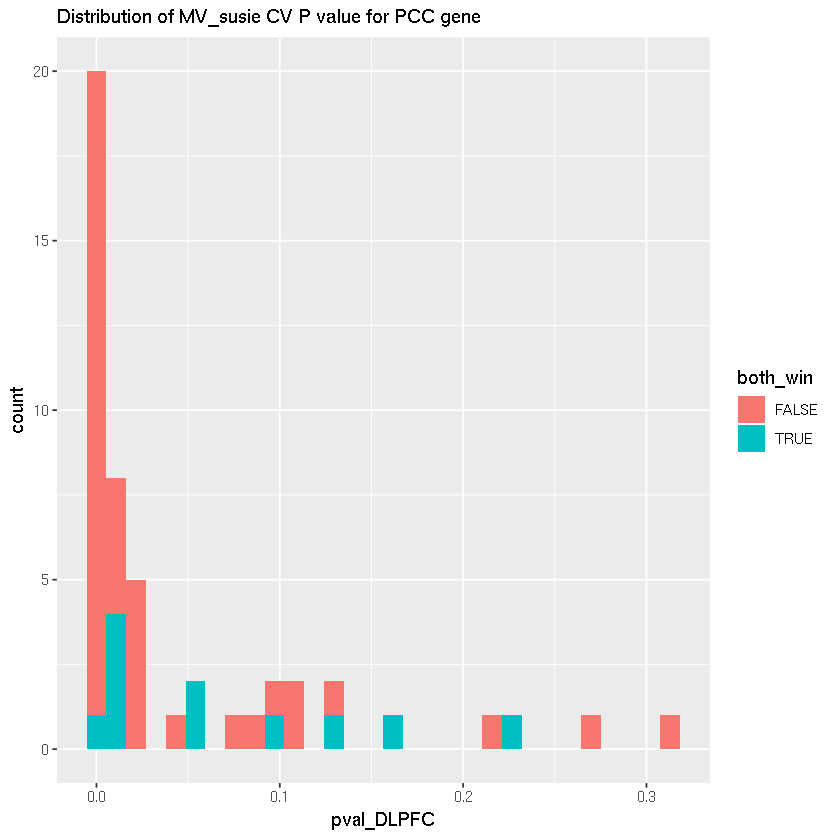

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



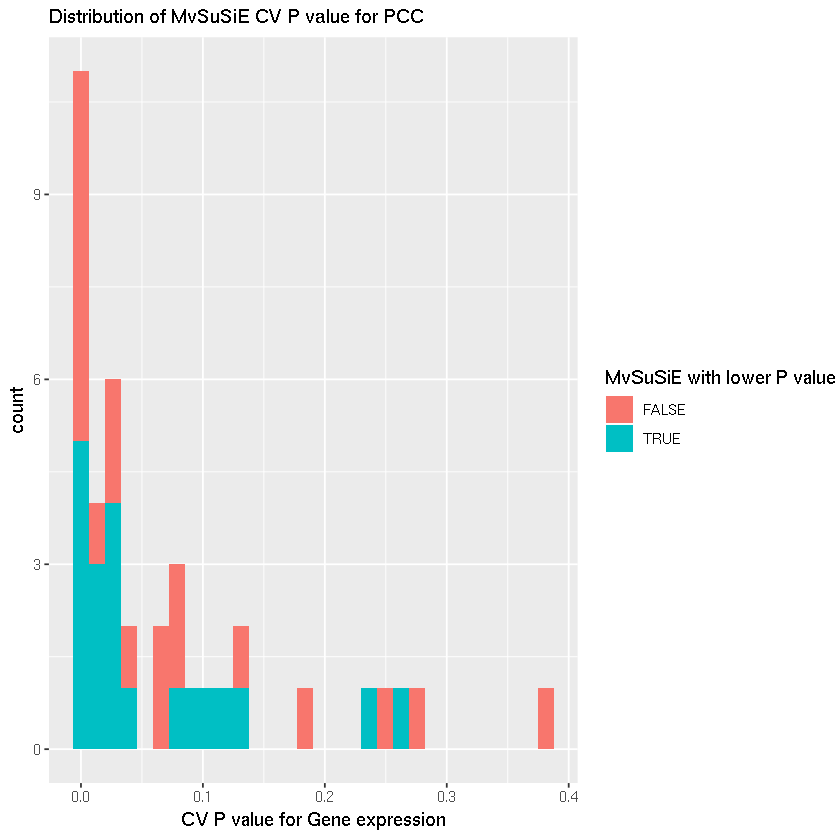

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



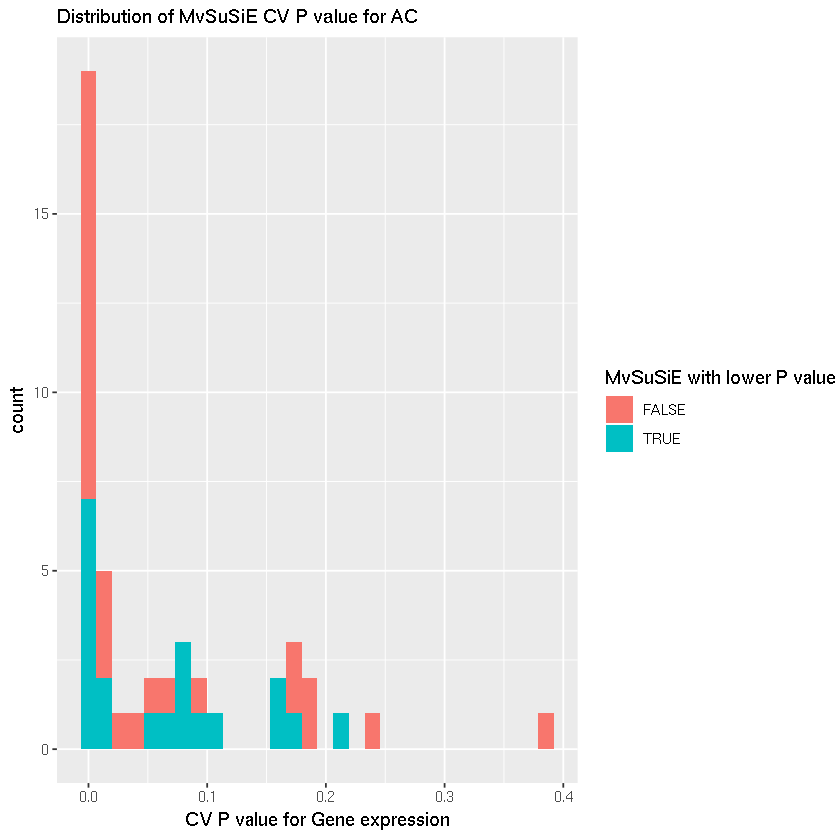

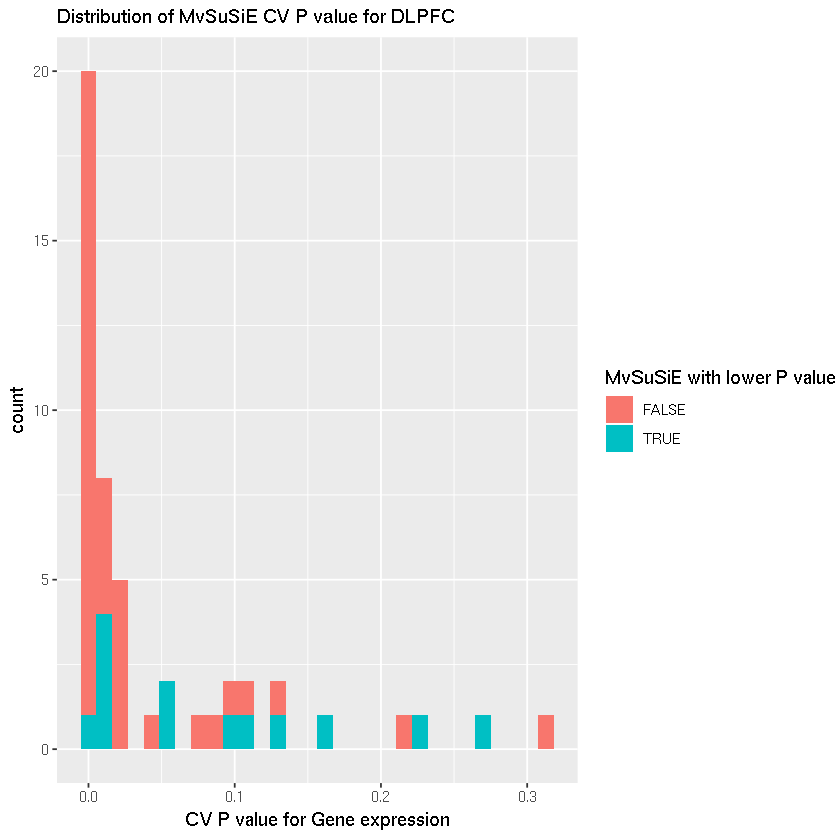

In [96]:
analysis_comp$sum_data[[2]]%>%filter()%>%ggplot(aes(x = pval_DLPFC,fill = both_win ))+geom_histogram()+ggtitle("Distribution of MV_susie CV P value for PCC gene")
analysis_comp$sum_data[[3]]%>%filter()%>%ggplot(aes(x = pval_PCC,fill = pv_less ))+geom_histogram()+
ggtitle("Distribution of MvSuSiE CV P value for PCC")+xlab("CV P value for Gene expression")+labs(fill = "MvSuSiE with lower P value")

analysis_comp$sum_data[[1]]%>%filter()%>%ggplot(aes(x = pval_ac,fill = pv_less ))+geom_histogram()+
ggtitle("Distribution of MvSuSiE CV P value for AC")+xlab("CV P value for Gene expression")+labs(fill = "MvSuSiE with lower P value")

analysis_comp$sum_data[[2]]%>%filter()%>%ggplot(aes(x = pval_DLPFC,fill = pv_less ))+geom_histogram()+
ggtitle("Distribution of MvSuSiE CV P value for DLPFC")+xlab("CV P value for Gene expression")+labs(fill = "MvSuSiE with lower P value")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



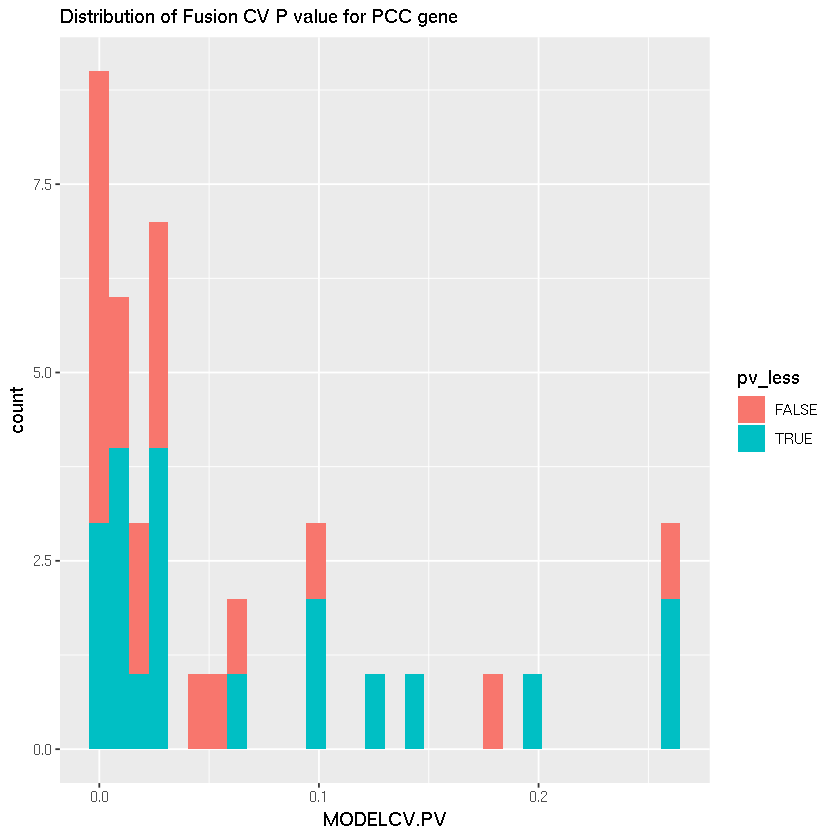

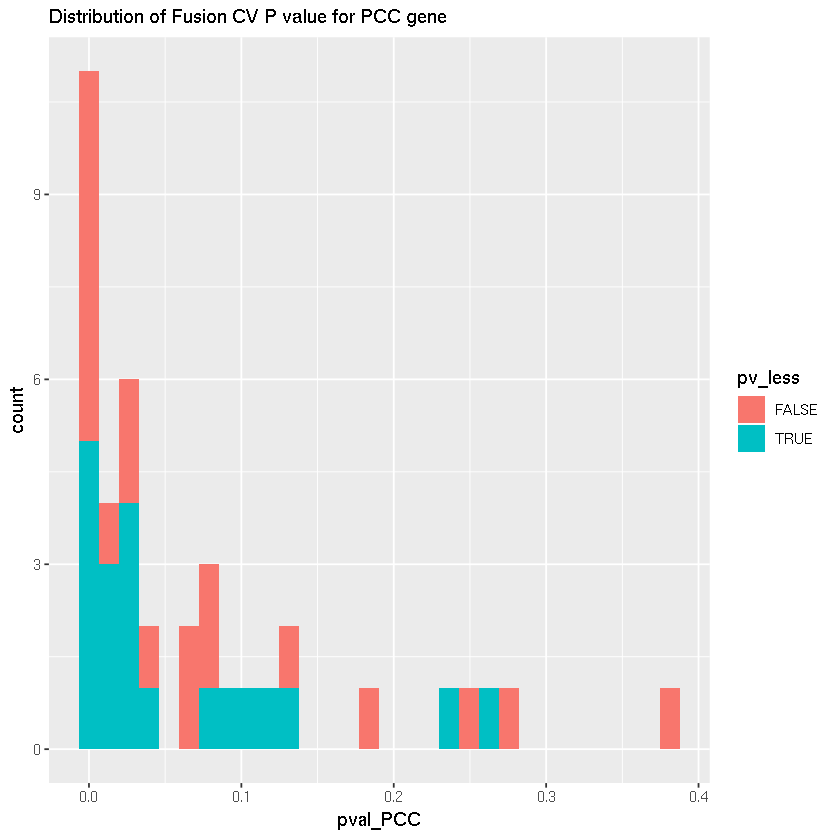

In [78]:
analysis_comp$sum_data[[3]]%>%filter()%>%ggplot(aes(x = MODELCV.PV, fill = pv_less))+geom_histogram()+ggtitle("Distribution of Fusion CV P value for PCC gene")
analysis_comp$sum_data[[3]]%>%filter()%>%ggplot(aes(x = pval_PCC, fill = pv_less))+geom_histogram()+ggtitle("Distribution of Fusion CV P value for PCC gene")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



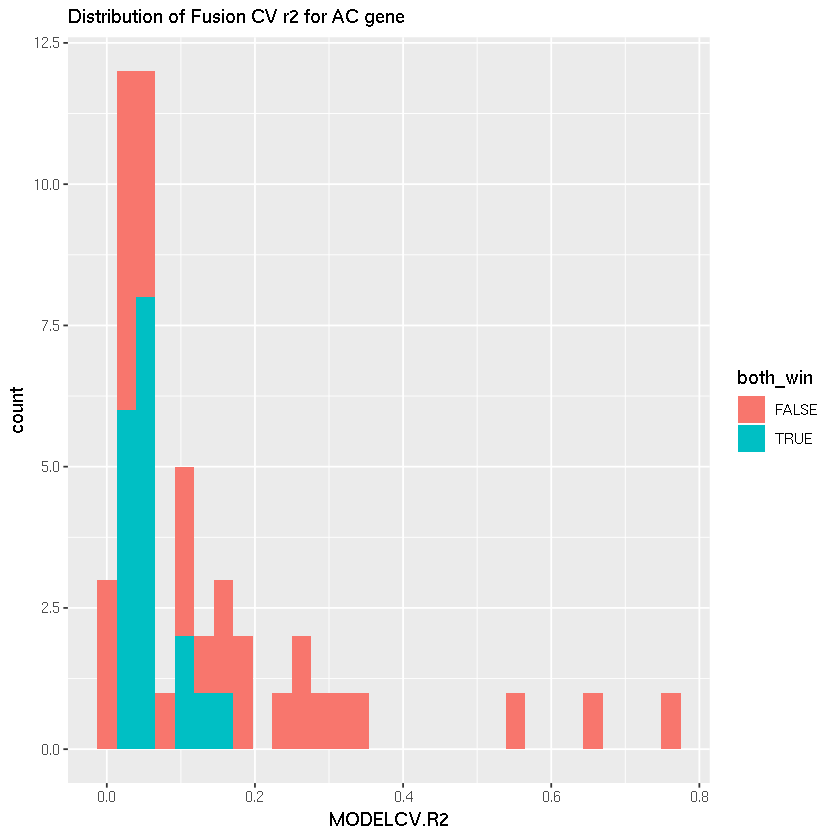

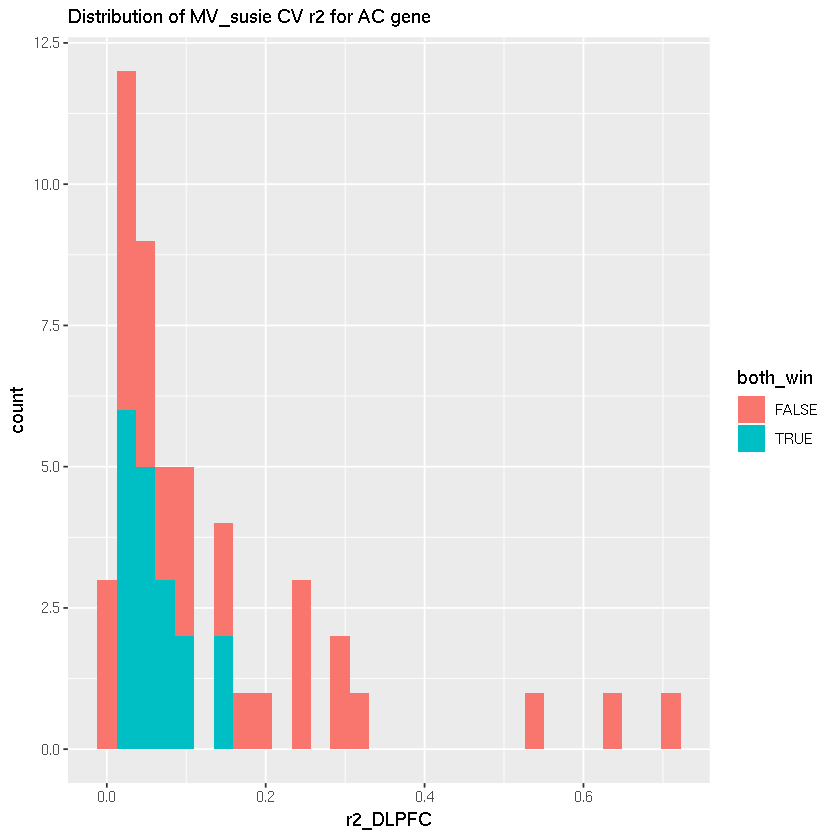

In [46]:
analysis_comp$sum_data[[2]]%>%filter()%>%ggplot(aes(x = MODELCV.R2, fill = both_win))+geom_histogram()+ggtitle("Distribution of Fusion CV r2 for AC gene")
analysis_comp$sum_data[[2]]%>%filter()%>%ggplot(aes(x = r2_DLPFC,fill = both_win ))+geom_histogram()+ggtitle("Distribution of MV_susie CV r2 for AC gene")

ERROR: Error in a[[1]]: wrong arguments for subsetting an environment


ERROR: Error in a[[1]]: wrong arguments for subsetting an environment


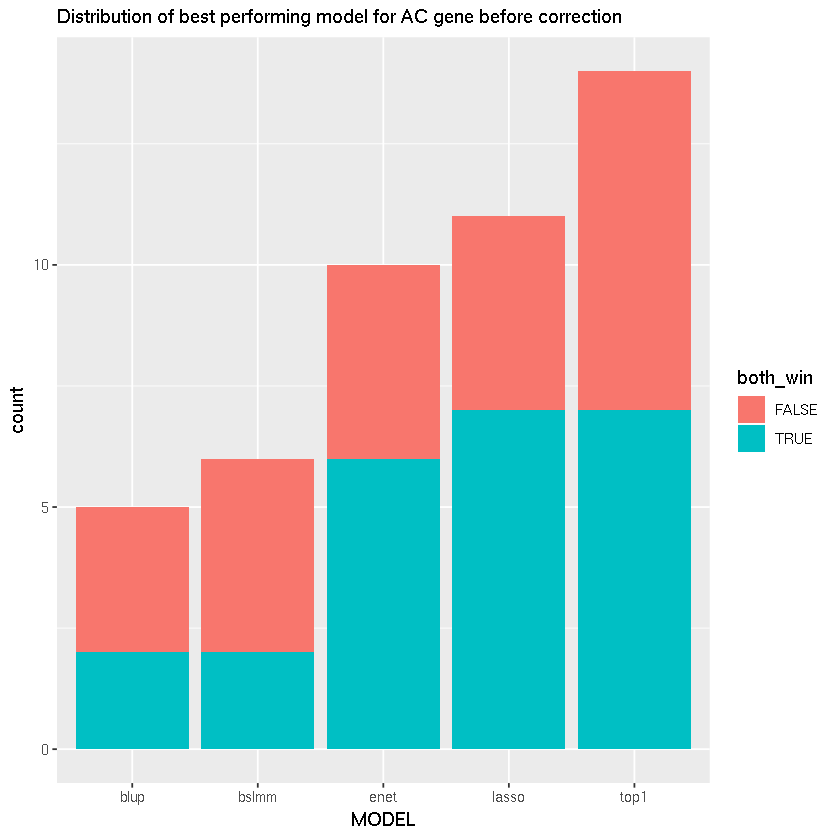

In [47]:
analysis_comp$sum_data[[1]]%>%filter()%>%ggplot(aes(x = MODEL, fill = both_win))+geom_bar()+ggtitle("Distribution of best performing model for AC gene before correction")

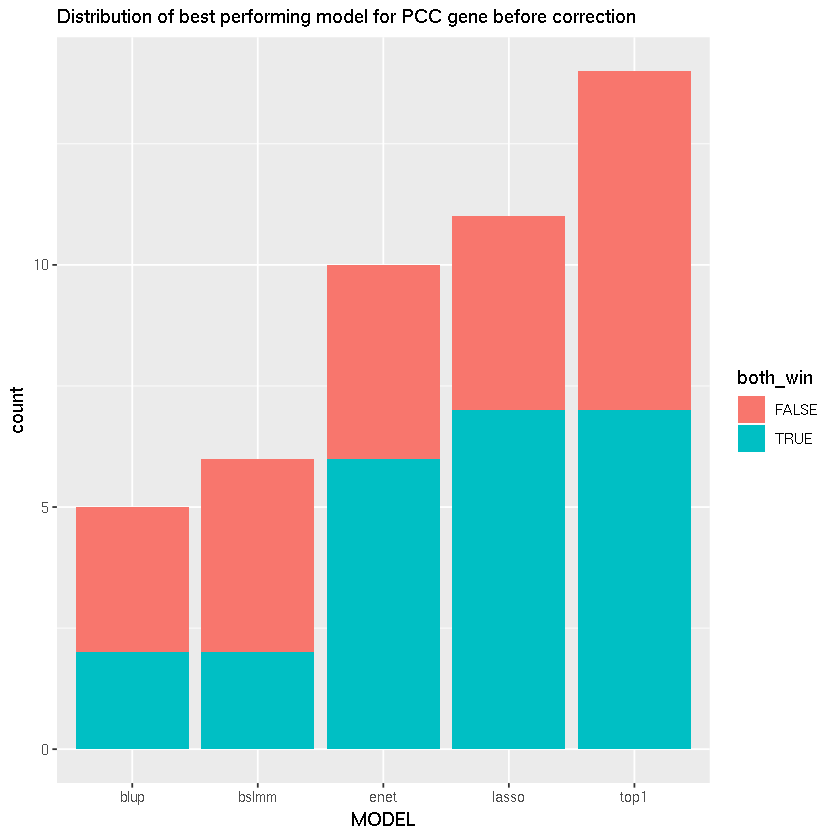

In [48]:
analysis_comp$sum_data[[1]]%>%filter()%>%ggplot(aes(x = MODEL, fill = both_win))+geom_bar()+ggtitle("Distribution of best performing model for PCC gene before correction")

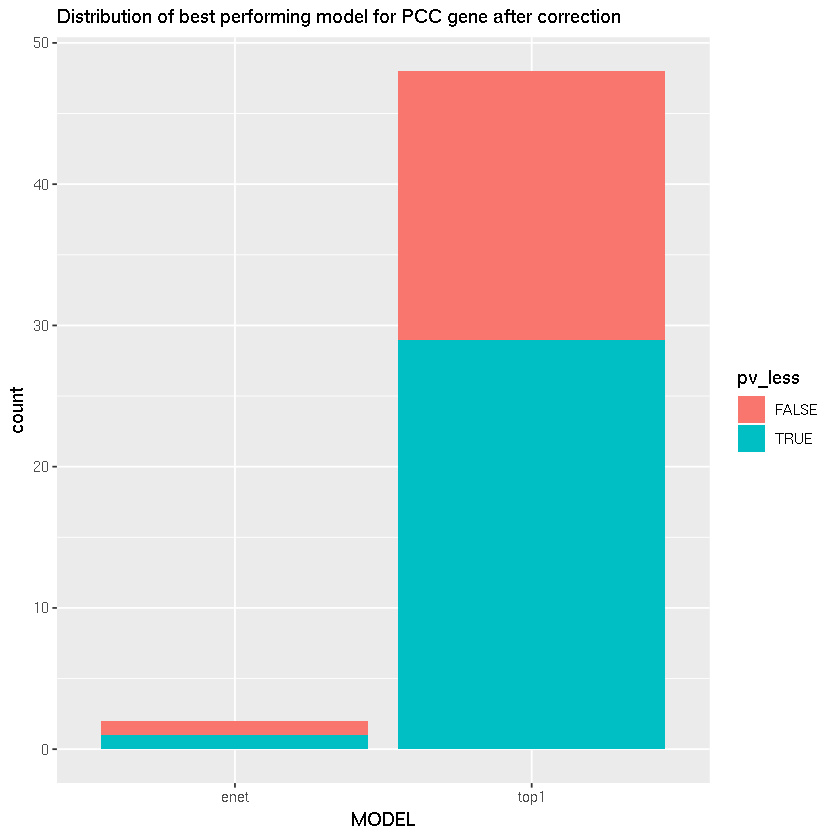

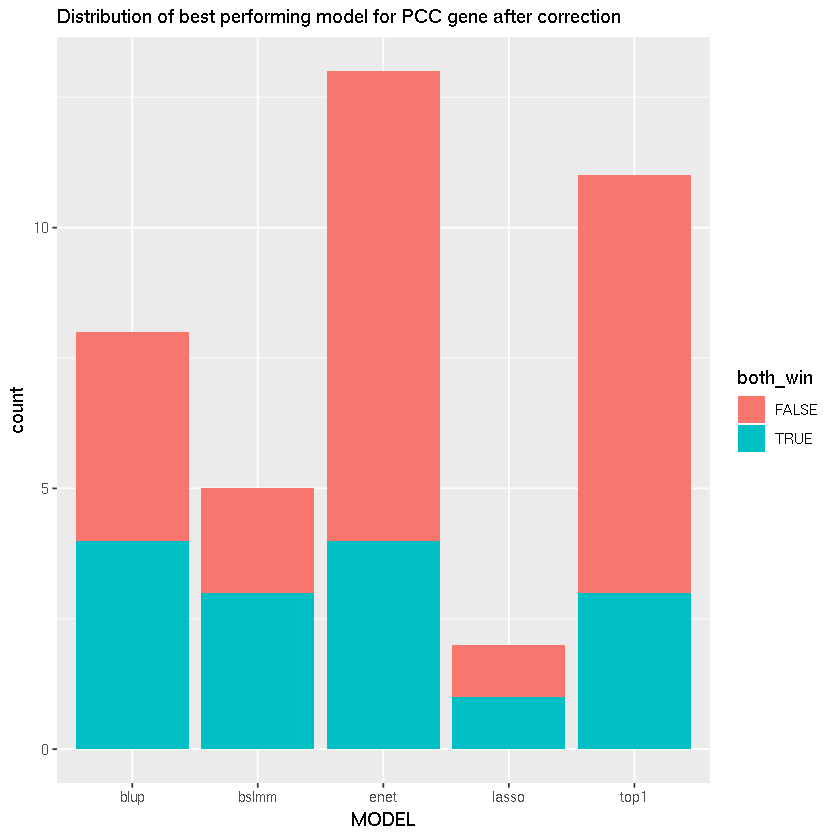

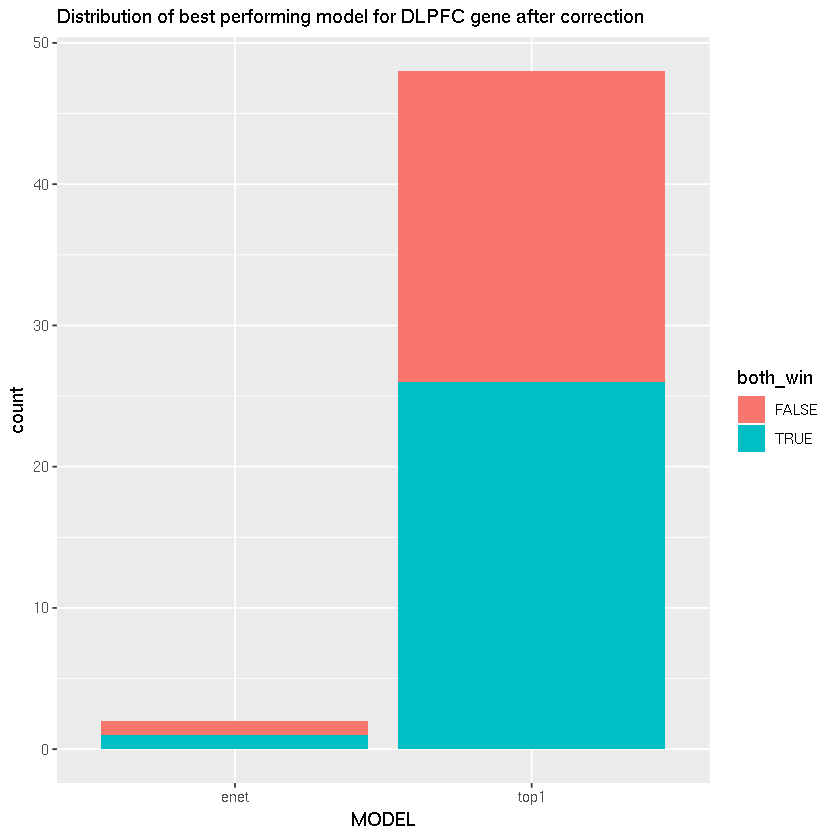

In [49]:
analysis_comp_arch$sum_data[[2]]%>%filter()%>%ggplot(aes(x = MODEL, fill = pv_less))+geom_bar()+ggtitle("Distribution of best performing model for PCC gene after correction")
analysis_comp$sum_data[[3]]%>%filter()%>%ggplot(aes(x = MODEL, fill = both_win))+geom_bar()+ggtitle("Distribution of best performing model for PCC gene after correction")
analysis_comp_arch$sum_data[[2]]%>%filter()%>%ggplot(aes(x = MODEL, fill = both_win))+geom_bar()+ggtitle("Distribution of best performing model for DLPFC gene after correction")



In [51]:
analysis_comp$sum_data[[1]]%>%select(-both_win)

PANEL,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,⋯,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj,r2_ac,r2_more,pval_ac,pv_less
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,"<lgl[,1]>",<dbl>,"<lgl[,1]>"
NA,ENSG00000158869,1,161215234,161220699,0.0616,1:161155392_A_G,6.37,1:161156033_A_C,0.03611,⋯,top1,0.0360,1.547368e-01,-6.22,5.05e-10,8.248333e-09,0.029,FALSE,8.500597e-02,TRUE
NA,ENSG00000203710,1,207496147,207641765,0.0553,1:207786828_A_G,-8.88,1:207802552_A_C,0.00562,⋯,lasso,0.0120,2.085106e-01,7.15,8.63e-13,2.114350e-11,0.022,TRUE,1.653224e-01,TRUE
NA,ENSG00000110079,11,60185702,60317944,0.0655,11:59958380_A_C,-8.01,11:60097853_C_T,0.036,⋯,top1,0.0360,1.265833e-01,4.55,5.29e-06,3.703000e-05,0.037,TRUE,9.472857e-02,TRUE
NA,ENSG00000140090,14,92322581,92501481,0.0992,14:92938855_A_G,-6.42,14:92795364_A_G,0.00496,⋯,bslmm,0.0490,2.638462e-02,-0.859,0.39,4.660976e-01,0.022,FALSE,1.891092e-01,FALSE
NA,ENSG00000103642,15,63121833,63142061,0.0679,15:63517347_A_G,5.21,15:63408320_A_G,0.100775,⋯,top1,0.1000,7.795455e-03,2.65,0.00817,2.502063e-02,0.094,FALSE,8.328628e-03,FALSE
NA,ENSG00000128923,15,58771192,58861900,0.0470,15:59022615_C_T,-6.08,15:59063144_A_C,-0.000478,⋯,enet,0.0092,2.600000e-01,-1.62,0.10446,1.765014e-01,0.018,TRUE,2.106953e-01,TRUE
NA,ENSG00000140416,15,63042632,63071915,0.0516,15:63517347_A_G,5.21,15:63370358_C_T,0.030811,⋯,top1,0.0310,1.265833e-01,-1.95,0.05103,9.415000e-02,0.036,TRUE,9.017499e-02,TRUE
NA,ENSG00000103510,16,31114489,31131393,0.0822,16:31133100_A_G,-5.5,16:31149142_A_G,0.0818,⋯,top1,0.0820,1.528800e-02,-4.57,4.79e-06,3.703000e-05,0.091,TRUE,5.403043e-03,TRUE
NA,ENSG00000178226,16,31138926,31150083,0.1212,16:31133100_A_G,-5.5,16:31154358_A_G,0.1225,⋯,top1,0.1200,1.758235e-03,-5.31,1.09e-07,1.254400e-06,0.123,TRUE,3.722607e-04,TRUE


In [539]:
b = attach("~/Project/Alz/Alz_PCC_SNP/WEIGHTS_Arch/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat")

The following objects are masked _by_ .GlobalEnv:

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from a:

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from file:~/Project/Alz/Alz_PCC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat (pos = 5):

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from file:~/Project/Alz/Alz_PCC_SNP/WEIGHTS_Arch/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat (pos = 6):

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from file:~/Project/Alz/Alz_PCC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat (pos = 7):

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from file:~/Project/Alz/Alz_DLPFC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000007047.wgt.RDat:

    cv.performa

In [540]:
a = attach("~/Project/Alz/Alz_PCC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat")

The following objects are masked _by_ .GlobalEnv:

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from file:~/Project/Alz/Alz_PCC_SNP/WEIGHTS_Arch/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat (pos = 3):

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from a:

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from file:~/Project/Alz/Alz_PCC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat (pos = 6):

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from file:~/Project/Alz/Alz_PCC_SNP/WEIGHTS_Arch/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat (pos = 7):

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from file:~/Project/Alz/Alz_PCC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat (pos = 8):

  

In [541]:
a$cv.performance

,bslmm,blup,lasso,top1,enet
rsq,0.01382222,0.01242691,0.03538084,-0.0006595748,-0.004367226
pval,0.33546500,0.30731861,0.29131895,0.4724055987,0.589282223


In [542]:
b$cv.performance

,bslmm,blup,lasso,top1,enet
rsq,0.0004160387,-0.0007215145,-0.001903618,-0.001247854,-0.001666375
pval,0.2700770086,0.4311216860,0.980479105,0.557525849,0.723873812


In [443]:
c = read_delim("~/Project/Alz/Alz_PCC_SNP/result_Arch/all_result.txt" , delim = "\t")

Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.



In [494]:
c%>%filter(ID == "ENSG00000106330")

PANEL,FILE,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,///home/hs3163/Project/Alz/Alz_PCC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat,ENSG00000106330,7,100612102,100615384,0.0859,7:100159567_A_G,5.95,7:100614851_C_T,-0.00125,4.44,0.0454,1261,1261,bslmm,0.00042,0.27,-0.326,7.45e-01


In [495]:
d = read_delim("~/Project/Alz/Alz_PCC_SNP/result/all_result.txt" , delim = "\t")

Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.



In [496]:
d%>%filter(ID == "ENSG00000106330")

PANEL,FILE,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,///home/hs3163/Project/Alz/Alz_PCC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat,ENSG00000106330,7,100612102,100615384,0.0859,NA,NA,NA,NA,NA,NA,0,0,lasso,0.035,0.29,NA,NA


In [497]:
c("SNP","CHR","BP","A1","A2","SNP_rsID","Z","P","Nsum","Neff","dir","EAF","BETA","SE")

[1] "SNP"      "CHR"      "BP"       "A1"       "A2"       "SNP_rsID"
 [7] "Z"        "P"        "Nsum"     "Neff"     "dir"      "EAF"     
[13] "BETA"     "SE"

In [461]:
attach(a)

The following objects are masked _by_ .GlobalEnv:

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from file:~/Project/Alz/Alz_PCC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat (pos = 3):

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from file:~/Project/Alz/Alz_PCC_SNP/WEIGHTS_Arch/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat:

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from file:~/Project/Alz/Alz_PCC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat (pos = 5):

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix


The following objects are masked from file:~/Project/Alz/Alz_DLPFC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000007047.wgt.RDat:

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix




ERROR: Error in match(snps[, 2], genos$bim[, 2]): object 'genos' not found


In [467]:
genos = read_plink("~/Project/Alz/muti_mp_3/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.transformed_XY.RData",impute="avg")

ERROR: Error in read_plink("~/Project/Alz/Alz_PCC_SNP/cache/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330", : could not find function "read_plink"


In [468]:
genos = attach("~/Project/Alz/muti_mp_3/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.transformed_XY.RData")

In [476]:
geno = list()
geno$bed = genos$scaled_ENSG00000106330[[1]]
geno$fam = genos$scaled_ENSG00000106330[[2]]

In [473]:
geno$bed

,7:100115878_A_G,7:100116424_A_T,7:100119315_C_T,7:100120585_C_T,7:100122680_G_T,7:100123279_C_T,7:100123523_G_T,7:100126835_A_G,7:100127558_A_G,7:100127777_A_C,⋯,7:101109690_A_C,7:101109705_A_G,7:101110975_C_T,7:101111102_A_C,7:101111182_A_G,7:101112721_A_G,7:101113348_A_G,7:101113729_C_T,7:101113835_C_T,7:101113905_C_T
MAP15387421:MAP15387421,-0.3950137,-0.3956908,-0.3956908,-0.4857991,-0.5130208,-0.7005453,-0.2367535,-0.5113133,-0.5130208,-0.6979925,⋯,0.4711394,0.4711394,0.5701424,0.5761753,-0.4184138,-0.2303661,-0.2552852,0.07999652,-0.3218029,0.5716329
MAP22868024:MAP22868024,2.2521676,2.2170323,2.2170323,-0.4857991,-0.5130208,1.1123933,-0.2367535,-0.5113133,-0.5130208,1.1083396,⋯,1.9608688,1.9608688,2.0984644,2.1115031,-0.4184138,-0.2303661,-0.2552852,1.48856270,-0.3218029,2.1039502
MAP26637867:MAP26637867,-0.3950137,-0.3956908,-0.3956908,1.7956763,1.6600578,1.1123933,-0.2367535,1.6647973,1.6600578,1.1083396,⋯,1.9608688,1.9608688,2.0984644,2.1115031,-0.4184138,-0.2303661,-0.2552852,1.48856270,-0.3218029,2.1039502
MAP29629849:MAP29629849,-0.3950137,-0.3956908,-0.3956908,-0.4857991,-0.5130208,-0.7005453,-0.2367535,-0.5113133,-0.5130208,-0.6979925,⋯,1.9608688,1.9608688,2.0984644,2.1115031,-0.4184138,-0.2303661,-0.2552852,1.48856270,-0.3218029,2.1039502
MAP33332646:MAP33332646,-0.3950137,-0.3956908,-0.3956908,-0.4857991,-0.5130208,-0.7005453,-0.2367535,-0.5113133,-0.5130208,-0.6979925,⋯,-1.0185901,-1.0185901,-0.9581796,-0.9591524,2.1728662,-0.2303661,-0.2552852,0.07999652,-0.3218029,-0.9606845
MAP34726040:MAP34726040,-0.3950137,-0.3956908,-0.3956908,1.7956763,1.6600578,1.1123933,-0.2367535,1.6647973,1.6600578,1.1083396,⋯,0.4711394,0.4711394,0.5701424,0.5761753,-0.4184138,-0.2303661,-0.2552852,0.07999652,-0.3218029,0.5716329
MAP46246604:MAP46246604,-0.3950137,-0.3956908,-0.3956908,1.7956763,1.6600578,1.1123933,-0.2367535,1.6647973,1.6600578,1.1083396,⋯,0.4711394,0.4711394,0.5701424,0.5761753,-0.4184138,-0.2303661,-0.2552852,0.07999652,-0.3218029,0.5716329
MAP46251007:MAP46251007,-0.3950137,-0.3956908,-0.3956908,-0.4857991,-0.5130208,-0.7005453,-0.2367535,-0.5113133,-0.5130208,-0.6979925,⋯,0.4711394,0.4711394,0.5701424,0.5761753,-0.4184138,-0.2303661,-0.2552852,1.48856270,2.9583925,0.5716329
MAP50104134:MAP50104134,2.2521676,2.2170323,2.2170323,-0.4857991,-0.5130208,1.1123933,-0.2367535,-0.5113133,-0.5130208,1.1083396,⋯,0.4711394,0.4711394,0.5701424,0.5761753,-0.4184138,-0.2303661,-0.2552852,0.07999652,-0.3218029,0.5716329
MAP50104846:MAP50104846,-0.3950137,-0.3956908,-0.3956908,1.7956763,1.6600578,1.1123933,-0.2367535,1.6647973,1.6600578,1.1083396,⋯,0.4711394,0.4711394,0.5701424,0.5761753,-0.4184138,-0.2303661,3.9128256,0.07999652,-0.3218029,0.5716329


In [477]:
 a = read_delim("~/Project/Alz/Alz_AC_SNP/result/all_result.txt",delim = "\t")


Parsed with column specification:
cols(
  .default = col_character()
)

See spec(...) for full column specifications.



In [478]:
a

PANEL,FILE,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,///home/hs3163/Project/Alz/Alz_AC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000158869.wgt.RDat,ENSG00000158869,1,161215234,161220699,0.0616,1:161155392_A_G,6.37,1:161156033_A_C,0.03611,-5.53,6.22,1236,1,top1,0.036,0.12,-6.22,5.05e-10
NA,///home/hs3163/Project/Alz/Alz_AC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.wgt.RDat,ENSG00000203710,1,207496147,207641765,0.0553,1:207786828_A_G,-8.88,1:207802552_A_C,0.00562,-4.16,-8.57,1168,8,lasso,0.012,0.2,7.15,8.63e-13
PANEL,FILE,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P
NA,///home/hs3163/Project/Alz/Alz_AC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000134463.wgt.RDat,ENSG00000134463,10,11742366,11764070,0.495,NA,NA,NA,NA,NA,NA,0,0,lasso,0.4,5.3e-12,NA,NA
PANEL,FILE,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P
NA,///home/hs3163/Project/Alz/Alz_AC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000110079.wgt.RDat,ENSG00000110079,11,60185702,60317944,0.0655,11:59958380_A_C,-8.01,11:60097853_C_T,0.036,5.56,4.55,1364,1,top1,0.036,0.091,4.55,5.29e-06
PANEL,FILE,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P
NA,///home/hs3163/Project/Alz/Alz_AC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000140090.wgt.RDat,ENSG00000140090,14,92322581,92501481,0.0992,14:92938855_A_G,-6.42,14:92795364_A_G,0.00496,4.63,-0.84,1721,1721,bslmm,0.049,0.014,-0.859,0.39
PANEL,FILE,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P


In [ ]:



sumstat = read.table("~/Project/Alz/data/AD_sumstats_Jansenetal_2019sept_chr7.txt",head=F,as.is=T)
genos = read_plink("~/Project/Alz/Alz_PCC_SNP/cache_arch/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330")
load("~/Project/Alz/Alz_PCC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000106330.wgt.RDat")
N = 1
chr = 7
out.tbl = data.frame( "PANEL" = rep(NA,N) , "FILE" = character(N) , "ID" = character(N) , "CHR" = numeric(N) , "P0" = character(N) , "P1" = character(N) ,"HSQ" = numeric(N) , "BEST.GWAS.ID" = character(N) , "BEST.GWAS.Z" = numeric(N) , "EQTL.ID" = character(N) , "EQTL.R2" = numeric(N) , "EQTL.Z" = numeric(N) , "EQTL.GWAS.Z" = numeric(N) , "NSNP" = numeric(N) , "NWGT" = numeric(N) , "MODEL" = character(N) , "MODELCV.R2" = character(N) , "MODELCV.PV" = character(N) , "TWAS.Z" = numeric(N) , "TWAS.P" = numeric(N) , stringsAsFactors=FALSE )
colnames(sumstat) = c("SNP","CHR","BP","A1","A2","SNP_rsID","Z","P","Nsum","Neff","dir","EAF","BETA","SE")

m = match( genos$bim[,2] , sumstat$SNP )
sum.missing = is.na(m)
sumstat = sumstat[m,]
sumstat$SNP = genos$bim[,2]
sumstat$A1[ sum.missing ] = genos$bim[sum.missing,5]
sumstat$A2[ sum.missing ] = genos$bim[sum.missing,6]

sum(!qc$keep)
if ( sum(!qc$keep) > 0 ) {
genos$bim = genos$bim[qc$keep,]
genos$bed = genos$bed[,qc$keep]
sumstat = sumstat[qc$keep,]
}
sum(is.na(genos$ed))
sum(is.na(genos$bed))
genos$bed[,qc$keep]
qc$keep
wgt.matrix[is.na(wgt.matrix)] = 0
m = match( snps[,2] , genos$bim[,2] )
m
m.keep = !is.na(m)
m.keep
snps = snps[m.keep,]
snps
wgt.matrix = wgt.matrix[m.keep,,drop=F]
cur.genos = scale(genos$bed[,m[m.keep]])
cur.genos
cur.bim = genos$bim[m[m.keep],]
qc = allele.qc( snps[,5] , snps[,6] , cur.bim[,5] , cur.bim[,6] )
wgt.matrix[qc$flip,] = -1 * wgt.matrix[qc$flip,]
cur.FAIL = FALSE
m = match(cur.bim[,2] , sumstat$SNP)
m
cur.Z = sumstat$Z[m]
row.rsq = grep( "rsq" , rownames(cv.performance) )
row.pval = grep( "pval" , rownames(cv.performance) )
mod.best = which.min(apply(cv.performance[row.pval,,drop=F],2,min,na.rm=T))
mod.best
wgt.matrix
cv.performance








# Record of data generation

In [ ]:
# First run
nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb twas_fusion --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt --molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/PCC/geneTpmResidualsAgeGenderAdj_rename.txt --wd /home/hs3163/Project/Alz/Alz_PCC_SNP/ --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt --region_list /home/hs3163/Project/Alz/data/RSM_Alz_region_list_PCC.txt --region_name 1 --data_start 2 --window 500000 --weights_path /home/hs3163/Project/Alz/Alz_PCC_SNP/WEIGHTS --weights_list /home/hs3163/Project/Alz/Alz_PCC_SNP/WEIGHTS/All_wgt_list.txt --container /mnt/mfs/statgen/containers/twas_latest.sif --job_size 1 --asso_mem "30G" -J 50 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml -s build
nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb twas_fusion --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt --molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename.txt --wd /home/hs3163/Project/Alz/Alz_DLPFC_SNP/ --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt --region_list /home/hs3163/Project/Alz/data/RSM_Alz_region_list_DLPFC.txt --region_name 1 --data_start 2 --window 500000 --weights_path /home/hs3163/Project/Alz/Alz_DLPFC_SNP/WEIGHTS --weights_list /home/hs3163/Project/Alz/Alz_DLPFC_SNP/WEIGHTS/All_wgt_list.txt --container /mnt/mfs/statgen/containers/twas_latest.sif --job_size 1 --asso_mem "30G" -J 50 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml -s build &
nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb twas_fusion --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt --molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt --wd /home/hs3163/Project/Alz/Alz_AC_SNP/ --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt --region_list /home/hs3163/Project/Alz/data/RSM_Alz_region_list_AC.txt --region_name 1 --data_start 2 --window 500000 --weights_path /home/hs3163/Project/Alz/Alz_AC_SNP/WEIGHTS --weights_list /home/hs3163/Project/Alz/Alz_AC_SNP/WEIGHTS/All_wgt_list.txt --container /mnt/mfs/statgen/containers/twas_latest.sif --job_size 1 --asso_mem "30G" -J 50 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml -s build &


# Second run
nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb twas_fusion --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt --molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/PCC/geneTpmResidualsAgeGenderAdj_rename.txt --wd /home/hs3163/Project/Alz/Alz_PCC_SNP/ --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt --region_list /home/hs3163/Project/Alz/data/RSM_Alz_region_list_PCC.txt --region_name 1 --data_start 2 --window 500000 --weights_path /home/hs3163/Project/Alz/Alz_PCC_SNP/WEIGHTS --weights_list /home/hs3163/Project/Alz/Alz_PCC_SNP/WEIGHTS/All_wgt_list.txt --container /mnt/mfs/statgen/containers/twas_latest.sif --job_size 1 --asso_mem "30G" -J 50 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml -s build
nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb twas_fusion --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt --molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename.txt --wd /home/hs3163/Project/Alz/Alz_DLPFC_SNP/ --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt --region_list /home/hs3163/Project/Alz/data/RSM_Alz_region_list_DLPFC.txt --region_name 1 --data_start 2 --window 500000 --weights_path /home/hs3163/Project/Alz/Alz_DLPFC_SNP/WEIGHTS --weights_list /home/hs3163/Project/Alz/Alz_DLPFC_SNP/WEIGHTS/All_wgt_list.txt --container /mnt/mfs/statgen/containers/twas_latest.sif --job_size 1 --asso_mem "30G" -J 50 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml -s build &
nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb twas_fusion --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt --molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt --wd /home/hs3163/Project/Alz/Alz_AC_SNP/ --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt --region_list /home/hs3163/Project/Alz/data/RSM_Alz_region_list_AC.txt --region_name 1 --data_start 2 --window 500000 --weights_path /home/hs3163/Project/Alz/Alz_AC_SNP/WEIGHTS --weights_list /home/hs3163/Project/Alz/Alz_AC_SNP/WEIGHTS/All_wgt_list.txt --container /mnt/mfs/statgen/containers/twas_latest.sif --job_size 1 --asso_mem "30G" -J 50 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml -s build &



In [2]:

diag = attach("/mnt/mfs/statgen/neuro-twas/mv_wg/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000076864.mv_susie.model.cv_diag.RData")

In [10]:
diag$cv_df$weight

In [107]:
analysis_comp$sum_data[[1]]%>%filter(MODELCV.PV < 0.05)%>%pull(pv_less)%>%sum
analysis_comp$sum_data[[2]]%>%filter(MODELCV.PV < 0.05)%>%pull(pv_less)%>%sum
analysis_comp$sum_data[[3]]%>%filter(MODELCV.PV < 0.05)%>%pull(pv_less)%>%sum

[1] 9

[1] 5

[1] 12

In [108]:
analysis_comp$sum_data[[1]]%>%filter(MODELCV.PV >= 0.05)%>%pull(pv_less)%>%sum
analysis_comp$sum_data[[2]]%>%filter(MODELCV.PV >= 0.05)%>%pull(pv_less)%>%sum
analysis_comp$sum_data[[3]]%>%filter(MODELCV.PV >= 0.05)%>%pull(pv_less)%>%sum

[1] 11

[1] 8

[1] 8

In [109]:
analysis_comp$sum_data%>%saveRDS("~/analysis_sum_data.RDS")